In [1]:
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('customers.csv')
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = KMeans(n_clusters=5, random_state=42)
scores = []


In [9]:
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    
    model.fit(X_train)
    y_pred = model.predict(X_test)
     

In [10]:
score = silhouette_score(X_test, y_pred)
scores.append(score)

In [11]:
print("Fold-wise Silhouette Scores:", scores)
print("Average Silhouette Score:", np.mean(scores))

Fold-wise Silhouette Scores: [0.4190700741318953, -0.13293864427697408, 0.41343165838046836, 0.10610488188598391]
Average Silhouette Score: 0.20141699253034337


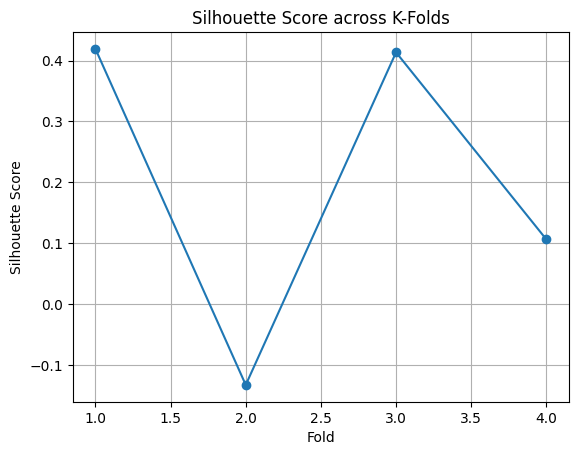

In [13]:
plt.plot(range(1, len(scores) + 1), scores, marker='o')

plt.title("Silhouette Score across K-Folds")
plt.xlabel("Fold")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()